In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from sklearn.decompostion import PCA

In [3]:
data=pd.read_csv('diabetes_data_upload.csv')
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


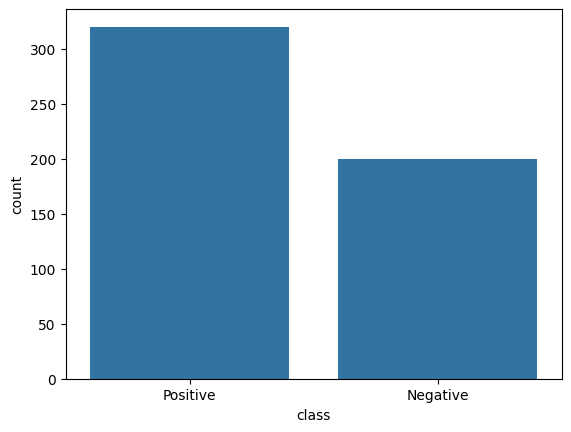

In [4]:
# p=[data['class']=='Positive']
# n=[data['class']=='Negetive']

sns.countplot(x='class', data=data)
plt.show()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [5]:
print('Data shape', data.shape)
print(data.info())
desc=data.describe()
desc.T

Data shape (520, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [6]:
data = data.dropna()

In [7]:
X=data[['Age','Gender', 'weakness', 'Itching' ,'Obesity', 'Polyuria']]
y=data['class']

X_train, X_test, y_train, y_test =train_test_split(X, y)
print(len(y_train), ' ', len(y_test))

390   130


In [8]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = X.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_columns:
  X_train[col] = label_encoder.fit_transform(X_train[col])
  X_test[col] = label_encoder.transform(X_test[col])

y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.transform(y_test)
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
co=0
cz=0
for i in y_test cnt++ if

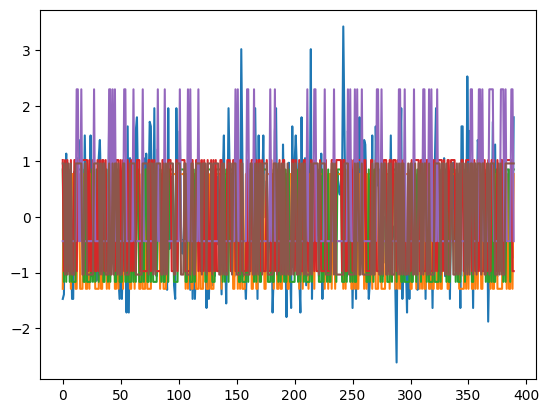

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.plot(X_train)
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialise models
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Train models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8692307692307693
Decision Tree Accuracy: 0.9230769230769231
Random Forest Accuracy: 0.9230769230769231


In [11]:
from sklearn.metrics import classification_report

# Display classification report for each model
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dtree))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85        59
           1       0.88      0.89      0.88        71

    accuracy                           0.87       130
   macro avg       0.87      0.87      0.87       130
weighted avg       0.87      0.87      0.87       130

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        59
           1       0.92      0.94      0.93        71

    accuracy                           0.92       130
   macro avg       0.92      0.92      0.92       130
weighted avg       0.92      0.92      0.92       130

Random Forest Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91        59
           1       0.90      0.97      0.93        71

    accuracy                           0.92       130
   macro avg       0.93      0.92      0.92       130

In [37]:
import pickle

# Save the trained model using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)